### Gaussian/parabolic approximation

In the [Max Posterior notebook](Max-Posterior.ipynb), we calculated the likelihood function $L(\theta)$ and posterior function $P(\theta)$ for a parameter on a fine grid of trial values, and then used the curve to numerically estimate the "best" value of the parameter and its probability range. All the stats are contained in that notebook.


However, sometimes doing the calculation on a fine grid is not feasible, and/or its not feasible to calculate likelihood over a large enough range of $\theta$ to get our normalising factor $E$. We can then use the *Gaussian approximation* discussed in the notes, using just three calculated values of likelihood or posterior. In a similar fashion, if we have $\chi^2(\theta)$, we can use the parabolic approximation, which is essentially the same thing. Let's see this in practice, and check that it works.

We will use the same problem we have used multiple times in the course notes and the notebooks -  estimating the mean of a small set of $N$ data points. We will illustrate using likelihood, so we don't need to set a prior. The general idea is that we calculate the likelihood on a fine grid, then calculate it at three points, find the Gaussian that goes through those points, and then compare the Gaussian approximation with the real thing.

First, the usual setup:

In [73]:
import numpy as np
from math import *
from scipy import stats 
import matplotlib.pyplot as plt

#### Input data

Now we will set up the input data. Our default data is the same as we used in the [Max Posterior Notebook](Max-Posterior.ipynb), but of course you can change this if you like. We also calculate the straight sample mean and the usual error on the mean, for later comparison with the Gaussian approximation method.

In [74]:
############ set input data to test
data=[256.0, 239.0, 237.0, 278.0, 266.0, 240.0] # define sample as a list of values
sig=16.0 # error on all points

N= len(data) # get the number of points in the sample
samplemean=np.mean(data)  # for later comparison
errmean=sig/N**0.5 # for later comparison

#### Calculate Likelihood curve

Next, calculate the actual $L(\mu)$ curve. Set up an array of finely spaced mu values, and for each one of those, loop over the points getting the joint likelihood. 

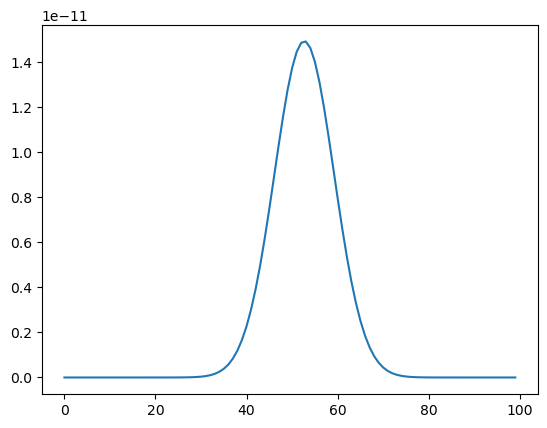

In [80]:
# set up the fine grid of mu values
mumin=200.  
mumax=300.
mustep=1.0
muarray = np.arange(mumin,mumax,mustep)
# calculate the likelihood array
Lmu=np.zeros(len(muarray)) # initialise likelihood array
for imu in range(0,len(muarray)):      # get likelihood at each mu-value
    L=1.0
    for k in range(0,N):
        L*=stats.norm.pdf(data[k],muarray[imu],sig)  #accumulate joint likelihood
    Lmu[imu]=L
plt.plot(Lmu)  #  Quickly sketch the L(mu)

#### Pick three points

For the Gaussian approximation method, we we pick three values of $\mu$ which should straddle the peak, and calculate the likelihood  at those three values. We also get the log of Likelihood, which is what we actually use in the formula.


In [81]:
# create array of three equally spaced mu points         
delmu=7.0
mupts=[244.0,251.0,258.0]
# calculate joint likelihood at each point
Lpts=np.zeros(3)
logLpts=np.zeros(3)
for i in range(0,3):
    L=1.0
    for k in range(0,N):
        L*=stats.norm.pdf(data[k],mupts[i],sig)        
    Lpts[i]=L
    logLpts[i]=log(Lpts[i])    
    print(i,mupts[i],Lpts[i],round(logLpts[i],3))

0 244.0 6.182367775349137e-12 -25.809
1 251.0 1.4430695693939067e-11 -24.962
2 258.0 1.0682173598269839e-11 -25.262


#### Get the approximating Gaussian curve

Next, from the three points (mupts,logLpts) we calculate the mean and variance assuming a Gaussian fit, using the formula in the notes. Then using those values, we generate a Gaussian curve for comparison to the likelihood curve.

In [82]:
top=logLpts[2]-logLpts[1]
bottom=logLpts[0] -2.*logLpts[1] + logLpts[2]
mu0=mupts[2]-delmu*(top/bottom + 1/2.)
sigmu = delmu*sqrt(1./(2.*logLpts[1]-logLpts[0]-logLpts[2]))

print('=== Gaussian three point approximation====')
print ('fitted mean=',round(mu0,3),' standard deviation=',round(sigmu,3))
print('straight sample mean =',round(samplemean,3),' error on mean=',round(errmean,3))

# generate the array for the Gaussian curves
G=np.zeros(len(muarray))
G=stats.norm.pdf(muarray,mu0,sigmu)

=== Gaussian three point approximation====
fitted mean= 252.667  standard deviation= 6.532
straight sample mean = 252.667  error on mean= 6.532


You can see that, in this nice simple case at least, the values for mean and sigma we get from the Gaussian approximation curve are *exactly* the same as the standard sample mean and error on the mean. (Not the sample standard deviation...)

#### Comparison plot

Now we can plot the likelihood values and the Gaussian curve. For ease of comparison, we normalise everything.  We plot the Gaussian as a joined up curve, and the likelihood as a series of dots, with the three chosen points used for the calculation as larger circles. 

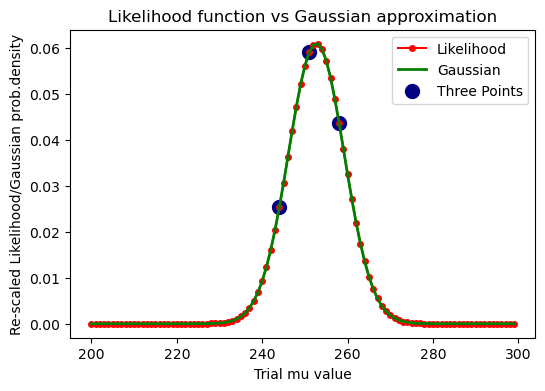

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Mormalization for Likelihood: to make the comparison graph loo sensible
Lsum = np.sum(Lmu)

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Likelihood function vs Gaussian approximation")
ax.set_xlabel("Trial mu value")
ax.set_ylabel("Re-scaled Likelihood/Gaussian prob.density")

# Plot Likelihood function, Gaussian, and three points using Matplotlib
ax.plot(muarray, Lmu/Lsum, label='Likelihood', color='red', marker='o', markersize=4)
ax.plot(muarray, G, label='Gaussian', color='green', linewidth=2)
ax.scatter(mupts, Lpts/Lsum, label='Three Points', color='navy', s=100, marker='o')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()


#### Curvature approximation

Finally, we also use the values for the three special points to calculate the $\sigma$ of the Gaussian using the curvature method described in the notes.

We introduced this as making a Gaussian approximation to the data, then approximating the Gaussian - in reality we're just fitting a parabola.

The numerical value for the curvature is to take the difference of points to get the gradient, and then difference of those gradients  to get the second derivative.



In [84]:
diff01=(logLpts[1]-logLpts[0])
diff12=(logLpts[2]-logLpts[1])
ddiff=diff12-diff01
deriv2=ddiff/(delmu*delmu)
cvar=-1/deriv2
csig=sqrt(cvar)

print('value of Gaussian sigma from curvature method=',round(csig,3))

value of Gaussian sigma from curvature method= 6.532


Reassuringly, this gives the same answer again, but is a simpler calculation, which is why it is a common method when doing model fitting in general.